## Loading and Processing Data

In [1]:
"""
wget basically grabs data for you from web server
"""
!wget https://www.dropbox.com/s/pan6mutc5xj5kj0/trainPart1.zip

--2021-04-08 03:17:25--  https://www.dropbox.com/s/pan6mutc5xj5kj0/trainPart1.zip
Resolving www.dropbox.com (www.dropbox.com)... 162.125.1.18, 2620:100:601a:18::a27d:712
Connecting to www.dropbox.com (www.dropbox.com)|162.125.1.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/pan6mutc5xj5kj0/trainPart1.zip [following]
--2021-04-08 03:17:25--  https://www.dropbox.com/s/raw/pan6mutc5xj5kj0/trainPart1.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc02810388df27b6ecc122889fe1.dl.dropboxusercontent.com/cd/0/inline/BMPPLnyxk6KVsKvOst12NWPt1n-qwTRY7yGgimXRbElzsG0Db1ZIJJbDmHBsAMhLlv2HzCWzGJseCGzTwdBRjp6NEZZfe-50ZVBMDppZFy2TRZMaql09wg2ASW8qvP-_cN0MVon_IzK3Tyok5oyAGw_F/file# [following]
--2021-04-08 03:17:25--  https://uc02810388df27b6ecc122889fe1.dl.dropboxusercontent.com/cd/0/inline/BMPPLnyxk6KVsKvOst12NWPt1n-qwTRY7yGgimXRbElzsG0Db1ZIJJbDmHBsAMhLlv2HzCWzGJseCGzTwdBR

In [2]:
"""
Let's unzip the zip file downloaded above
"""

!unzip trainPart1.zip

Archive:  trainPart1.zip
   creating: train/
   creating: train/Sample002/
  inflating: train/Sample002/img002-048.png  
  inflating: train/Sample002/img002-050.png  
  inflating: train/Sample002/img002-006.png  
  inflating: train/Sample002/img002-004.png  
  inflating: train/Sample002/img002-053.png  
  inflating: train/Sample002/img002-045.png  
  inflating: train/Sample002/img002-052.png  
  inflating: train/Sample002/img002-047.png  
  inflating: train/Sample002/img002-020.png  
  inflating: train/Sample002/img002-009.png  
  inflating: train/Sample002/img002-011.png  
  inflating: train/Sample002/img002-013.png  
  inflating: train/Sample002/img002-034.png  
  inflating: train/Sample002/img002-038.png  
  inflating: train/Sample002/img002-024.png  
  inflating: train/Sample002/img002-025.png  
  inflating: train/Sample002/img002-018.png  
  inflating: train/Sample002/img002-032.png  
  inflating: train/Sample002/img002-028.png  
  inflating: train/Sample002/img002-001.png  
  inf

In [3]:
"""
Let's change our working directory to "train",
Next step will be to rename existing file names to 0-9, A-Z, a-z

"""


import os # this module helps you in handling directories and file
os.chdir('/content/train')

In [4]:
"""
Here we are iterating inside train folder and renaming current file names with class name using 
ASCII value of each character
"""

for i in range(1,63):
  if i<10:
    path='Sample00'+str(i)
    os.rename(path, str(i-1))
  if i==10:
    path='Sample0'+str(i)
    os.rename(path, str(i-1))
  elif 10<i<37:
    path='Sample0'+str(i)
    x =54+i;
    os.rename(path,chr(x))
  elif 36<i<63:
    path='Sample0'+str(i)
    x =60+i;
    os.rename(path,chr(x))


In [5]:
ls # listing all the directories and files inside the current working directory

0/  4/  8/  b/  d/  f/  h/  j/  l/  n/  p/  r/  t/  v/  x/  z/
1/  5/  9/  B/  D/  F/  H/  J/  L/  N/  P/  R/  T/  V/  X/  Z/
2/  6/  a/  c/  e/  g/  i/  k/  m/  o/  q/  s/  u/  w/  y/
3/  7/  A/  C/  E/  G/  I/  K/  M/  O/  Q/  S/  U/  W/  Y/


In [6]:
# Let's see some images of our dataset

In [7]:
import matplotlib.pyplot as plt
#this module helps in ploting data 

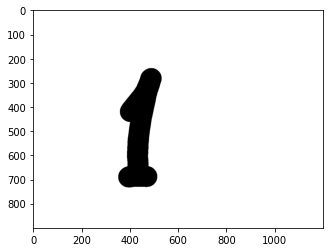

In [8]:
img=plt.imread('/content/train/1/img002-001.png')
plt.imshow(img,cmap=plt.cm.binary)

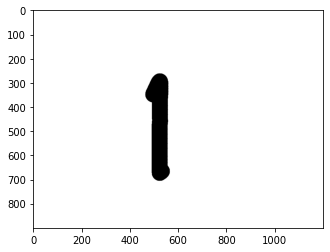

In [9]:
img=plt.imread('/content/train/1/img002-010.png')
plt.imshow(img,cmap=plt.cm.binary)

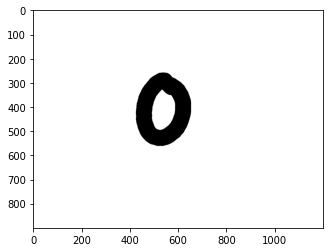

In [10]:
img=plt.imread('/content/train/0/img001-010.png')
plt.imshow(img,cmap=plt.cm.binary)

Looks like we got some good image dataset to train on.

In [11]:
from keras.preprocessing.image import ImageDataGenerator


"""
ImageDataGenerator is used as Image data augmentation in real-time but here it is used for rescaling and for loading data.
flow_from_directory is used which helps in resizing image and creating batch of themand 
that will be later passed to model as a input.
flow_from_directory automatically infers class label with the folder name. 
"""



train_datagen = ImageDataGenerator(rescale = 1./255,  # rescaling the data(MIN-MAX Scaler)
                                   data_format='channels_last', # (Batch-Size, height, width, channels)
                                   validation_split=0.1) #for checking model's performance after every epoch

val_datagen = ImageDataGenerator(rescale = 1./255,
                                   data_format='channels_last',
                                   validation_split=0.1)


"""
Model will be trained only on data available and incase if model performance needs more data we will use augmentation techniques, 
but for now experimenting with the data we have is first choice
"""

training_set = train_datagen.flow_from_directory('/content/train',  # directory of dataset
                                                 target_size = (64, 64), #output image size after loading
                                                 batch_size = 64,
                                                 class_mode = 'categorical', # we have 62 classes hence it's categorical
                                                 color_mode='grayscale',    
                                                 subset="training",
                                                 shuffle=True)

val_set = val_datagen.flow_from_directory('/content/train',
                                            target_size = (64,64),
                                            batch_size = 64,
                                            class_mode = 'categorical',
                                            color_mode='grayscale',
                                            subset="validation",
                                            shuffle=True)

Found 2232 images belonging to 62 classes.
Found 248 images belonging to 62 classes.


In [12]:
training_set.image_shape

#output from this generator will have shape of (batch_size,training_set.image_shape)

(64, 64, 1)

# Building Models for this subtask

In [13]:
# Impoting modules for model building, compiling and training

import tensorflow as tf
from tensorflow import keras
from keras import layers
import numpy as np
import matplotlib.pyplot as plt
import os, sys
from keras.preprocessing.image import ImageDataGenerator


### 1. Building Simple Model 

In the very first step building simple model is first priority.  
This let's you think deep how to create more advance models for this
working dataset

In [14]:
def SimpleModel():

    model= keras.Sequential() #it's sequential model
    model.add(layers.Conv2D(64,3,input_shape=(64, 64, 1),activation='relu',kernel_initializer='HeUniform')) #adding convolution layer 
    model.add(layers.MaxPool2D(pool_size=(2,2),data_format="channels_last")) # maxpooing the previous layer
    model.add(layers.Dropout(rate=0.3)) #helps as a regularizer(weak)

    model.add(layers.Conv2D(32,kernel_size=(3,3),activation='relu',kernel_initializer='HeUniform'))
    model.add(layers.MaxPool2D(pool_size=(2,2),data_format="channels_last"))
    model.add(layers.Dropout(rate=0.3))

    model.add(layers.Conv2D(32,kernel_size=(3,3),activation='relu',kernel_initializer='HeUniform'))
    model.add(layers.MaxPool2D(pool_size=(2,2),data_format="channels_last"))
    model.add(layers.BatchNormalization())
    model.add(layers.Dropout(rate=0.3))


    model.add(layers.Flatten())  # flattens everything form last layer

    model.add(layers.Dense(16,activation='relu',kernel_initializer='HeUniform')) #adding dense layer
    model.add(layers.BatchNormalization()) # Performing BatchNormalization on that
    model.add(layers.Dropout(rate=0.3))

    model.add(layers.Dense(62,activation='softmax')) #Output layer

    return model

In [15]:
first_model=SimpleModel()
first_model.summary() # Summarize all the layers with corresponing parameters to learn.

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 31, 31, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 29, 29, 32)        18464     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 32)        9

In [16]:
"""
Compiling model.
"""

first_model.compile(tf.keras.optimizers.Adam(learning_rate=0.009), #using adam optimizer
              loss=tf.keras.losses.CategoricalCrossentropy(), # we have multiclass-classification problem
              metrics=['accuracy']) #measures models performance


In [17]:
History=first_model.fit(training_set,epochs=100,verbose=1) # train model for 100 epochs

Epoch 1/100
35/35 [==============================] - 59s 767ms/step - loss: 4.3155 - accuracy: 0.0141
Epoch 2/100
35/35 [==============================] - 27s 780ms/step - loss: 4.0431 - accuracy: 0.0361
Epoch 3/100
35/35 [==============================] - 27s 775ms/step - loss: 3.7170 - accuracy: 0.0956
Epoch 4/100
35/35 [==============================] - 27s 782ms/step - loss: 3.4308 - accuracy: 0.1253
Epoch 5/100
35/35 [==============================] - 27s 783ms/step - loss: 3.2200 - accuracy: 0.1717
Epoch 6/100
35/35 [==============================] - 27s 777ms/step - loss: 3.0213 - accuracy: 0.2164
Epoch 7/100
35/35 [==============================] - 27s 784ms/step - loss: 2.7424 - accuracy: 0.2738
Epoch 8/100
35/35 [==============================] - 27s 786ms/step - loss: 2.3868 - accuracy: 0.3113
Epoch 9/100
35/35 [==============================] - 27s 777ms/step - loss: 2.2315 - accuracy: 0.3729
Epoch 10/100
35/35 [==============================] - 27s 785ms/step - loss: 2.066

In [18]:
"""
Loss was reducing upto a certain epochs, so training for more epochs would be beneficial if we change out learning rate to a little small,
Reducing learning rate now can lead to faster convergence, Let's do this experiment and if fail will try to come up something else.
"""


first_model.compile(tf.keras.optimizers.Adam(learning_rate=0.0007),
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])

History1=first_model.fit(training_set,epochs=20,validation_data=val_set)

Epoch 1/20
35/35 [==============================] - 32s 899ms/step - loss: 0.6748 - accuracy: 0.7583 - val_loss: 0.7829 - val_accuracy: 0.7540
Epoch 2/20
35/35 [==============================] - 30s 863ms/step - loss: 0.6392 - accuracy: 0.7782 - val_loss: 0.7624 - val_accuracy: 0.7661
Epoch 3/20
35/35 [==============================] - 30s 858ms/step - loss: 0.6122 - accuracy: 0.7982 - val_loss: 0.7659 - val_accuracy: 0.7621
Epoch 4/20
35/35 [==============================] - 30s 863ms/step - loss: 0.6392 - accuracy: 0.7782 - val_loss: 0.7602 - val_accuracy: 0.7581
Epoch 5/20
35/35 [==============================] - 30s 867ms/step - loss: 0.6552 - accuracy: 0.7805 - val_loss: 0.7552 - val_accuracy: 0.7581
Epoch 6/20
35/35 [==============================] - 30s 865ms/step - loss: 0.6246 - accuracy: 0.7813 - val_loss: 0.7655 - val_accuracy: 0.7581
Epoch 7/20
35/35 [==============================] - 30s 864ms/step - loss: 0.6271 - accuracy: 0.7815 - val_loss: 0.7628 - val_accuracy: 0.7621

In [ ]:
first_model.compile(tf.keras.optimizers.Adam(learning_rate=0.00005),
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])

History2=first_model.fit(training_set,epochs=5,validation_data=val_set)

Epoch 1/5
13/35 [==========>...................] - ETA: 17s - loss: 0.6032 - accuracy: 0.8094

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255,  # rescaling the data(MIN-MAX Scaler)
                                   data_format='channels_last') # (Batch-Size, height, width, channels)

training_set = train_datagen.flow_from_directory('/content/train',  # directory of dataset
                                                 target_size = (64, 64), #output image size after loading
                                                 batch_size = 64,
                                                 class_mode = 'categorical', # we have 62 classes hence it's categorical
                                                 color_mode='grayscale',    
                                                 shuffle=True)

In [ ]:
first_model.compile(tf.keras.optimizers.Adam(learning_rate=0.0007),
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])

History3=first_model.fit(training_set,epochs=5)

Even after giving complete dataset for training this model didn't approved and   
resulted in failure experiment, 

Let's save model architecture and weights,  
If we need any random model to train in future we'll try out this architecture.

In [ ]:
os.chdir('/content/')

In [ ]:
First = first_model.to_json()
#save the model architecture to JSON file
with open('first_model.json', 'w') as json_file:
    json_file.write(First)

In [ ]:
first_model.save('first_model.h5')

#saving model weights

### 2. Creating More Robust Model

In last model we got accuracy ___ which is descent but not too good considering we have 62 classes to deal with.  
In this model i'm using Skip Connection which allows to transfer learning from one layer to another(only if dimentions are same). Using this skip connection is a reason for using regularization.   
Regularizor to be used as we have less data and most likely we can overfit.  
Regularizor can turn out most of kernal weights to zero which can lead to have dead units and which will reduce chances of learning complex feature from the data.   
In this case Model uses two skip connection and in each connection model is learning some features so that if any one of the kernal in each of these layers fails to learn(dead units) model will learn from another one as we are using regularizers here.   

This architecture is inspired by a parallel resistance.


In [ ]:
from keras.constraints import max_norm

In [ ]:
def MiDasNet():
  """
  As we have connections so working with Sequencial Model is not feasibile.
  Hence in this model i'll be using keras Functional API(helps in creating flexible models)

  """
  input=keras.Input(shape=(64,64,1)) #taking input with shape 64*64
  input_2=layers.Conv2D(64,3,kernel_initializer='HeNormal',activation='relu',padding='same')(input) # passing input to this conv2d layer 

  input_2=layers.MaxPooling2D(2,2)(input_2)#passing last layer here for maxpooling 
  input_3=layers.Conv2D(64,3,padding='same',kernel_initializer='HeNormal',activation='relu')(input_2)

  """
  Now this input_3 will  be used by three layers layer_1,layer_2,layer_3 for leanring more complex features,
  Keep in mind that we are using this with kernal_regularizer.
  """
  layer_1=layers.Conv2D(32,1,padding='same',kernel_initializer='HeNormal',activation='relu',kernel_regularizer='l2')(input_3) #connection from input_3 layer to layer_1 
  layer_1=layers.BatchNormalization()(layer_1)
  layer_1=layers.MaxPooling2D(2,2)(layer_1)
  layer_1=layers.Dropout(0.3)(layer_1)

  layer_2=layers.Conv2D(32,1,kernel_initializer='HeNormal',activation='relu',kernel_regularizer='l2',padding='same')(input_3) #connection from input_3 layer to layer_2
  layer_2=layers.BatchNormalization()(layer_2)
  layer_2=layers.MaxPooling2D((2,2))(layer_2)
  layer_2=layers.Dropout(0.3)(layer_2)

  """
  Padding here is 'same' for keeping dimentions be equal at ending point of connection.
  """

  layer_3=layers.Conv2D(32,1,kernel_initializer='HeNormal',activation='relu',kernel_regularizer='l2',padding='same')(input_3) #connection from input_3 layer to layer_3
  layer_3=layers.BatchNormalization()(layer_3)
  layer_3=layers.MaxPooling2D((2,2))(layer_3)
  layer_3=layers.Dropout(0.3)(layer_3)

  """
  As we have layer_1, layer_2, layer_3 with same output dimention, we can use Add for adding these tensors.
  """

  sum_out=layers.add([layer_1,layer_2,layer_3])

  sum=layers.GlobalMaxPool2D()(sum_out)  #performing global maximum

  sum=layers.Flatten()(sum)   # flattens sum tensor to 1d tensor 
  out=layers.Dense(62,'softmax')(sum) #output layer
  model=keras.Model(input,out,name='MiDasNet') # grouping layer into object  https://www.tensorflow.org/api_docs/python/tf/keras/Model
  return model

In [ ]:
second_model=MiDasNet()

In [ ]:
second_model.summary() # Summarize all the layers with corresponing parameters to train.

In [ ]:
"""
Compiling model.
"""

second_model.compile(tf.keras.optimizers.Adam(learning_rate=0.001), #using adam optimizer
              loss=tf.keras.losses.CategoricalCrossentropy(), # we have multiclass-classification problem
              metrics=['accuracy']) #measures how good is this model

In [ ]:
"""
ImageDataGenerator is used as Image data augmentation in real-time but here it is used for rescaling and for loading data.
flow_from_directory is used which helps in resizing image and creating batch of themand 
that will be later passed to model as a input.
flow_from_directory automatically infers class label with the folder name. 
"""



train_datagen = ImageDataGenerator(rescale = 1./255,  # rescaling the data(MIN-MAX Scaler)
                                   rotation_range=5,
                                   data_format='channels_last') # (Batch-Size, height, width, channels)

"""
Model will be trained only on data available and incase if model performance needs more data we will use augmentation techniques, 
but for now experimenting with the data we have is first choice
"""

training_set = train_datagen.flow_from_directory('/content/train',  # directory of dataset
                                                 target_size = (64, 64), #output image size after loading
                                                 batch_size = 64,
                                                 class_mode = 'categorical', # we have 62 classes hence it's categorical
                                                 color_mode='grayscale',    
                                                 subset="training",
                                                 shuffle=True)

In [ ]:
training_set.image_shape

#output from this generator will have shape of (batch_size,training_set.image_shape)

In [ ]:
history=second_model.fit(training_set,epochs=100,verbose=1) # train model for 100 epochs

In [ ]:
"""
Compiling model.
"""

second_model.compile(tf.keras.optimizers.Adam(learning_rate=0.0007), #using adam optimizer
              loss=tf.keras.losses.CategoricalCrossentropy(), # we have multiclass-classification problem
              metrics=['accuracy']) #measures how good is this model

In [ ]:
"""
Loss is reducing in most of the epochs, so training for more epochs would be beneficial as accuracy might
increase and loss might reduce little more.
"""

history2=second_model.fit(training_set,epochs=20,verbose=1)

In [ ]:
"""
Loss is still reducing in most of the epochs, so training for more epochs would be beneficial as accuracy might
increase(targrtting 90%+ accuracy) and loss might reduce little more.
"""


history3=second_model.fit(training_set,epochs=10,verbose=1)

In [ ]:
"""
Reducing learning rate now can lead to faster convergence, Let's do this experiment and if fail
i will try to come up something else.
"""


second_model.compile(tf.keras.optimizers.Adam(learning_rate=0.0007),
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])

In [ ]:
"""
Loss is still reducing in most of the epochs and now i just want loss to reduce a little more 
to get upto 95%+ accuracy.
"""

history4=second_model.fit(training_set,epochs=20,verbose=1)


In [ ]:
"""
Let's reduce learning rate a little so that model can model can converge
"""
second_model.compile(tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])

In [ ]:
history5=second_model.fit(training_set,epochs=20)

### Done !!!

Still there are chances(possibility) that loss might reduce <1.0 and we can comeup with higher accuracy like 98/99%.   
Keeping in mind that my model might be overfit as we had small dataset with higher number of classes.As of now even a simpler model can beat my second model which is little complex but seems to be trustworthy

In [ ]:
second_model.save('second_model.h5') # saving weights

Modell = second_model.to_json()
#save the model architecture to JSON file
with open('second_model.json', 'w') as json_file:
    json_file.write(Modell)

In [ ]:
keras.utils.plot_model(second_model)

In [ ]:
keras.utils.plot_model(first_model)